In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import arabic_reshaper
from bidi.algorithm import get_display
import os

<div class="note" style="
background-color: #FFF2CC;  /* پس‌زمینه زرد ملایم */
border-left: 4px solid #E69F00;  /* حاشیه نارنجی */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>1) بارگزاری داده های خام</h1>

In [22]:
input_file_path = 'orders.csv'  # فایل داده خام
output_file_path = 'order_cleaned.csv'  # فایل داده تمیز شده

df = pd.read_csv(input_file_path)

# نمایش اطلاعات اولیه درباره داده‌ها
print("\n اطلاعات کلی:")
print(df.info())

# نمایش ۵ ردیف اول داده‌ها
print("\n نمونه‌ای از داده‌ها:")
display(df.head())

# آمار توصیفی داده‌های عددی
print("\n آمار توصیفی داده‌های عددی:")
display(df.describe())


 اطلاعات کلی:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Order               200000 non-null  int64  
 1   ID_Customer            200000 non-null  int64  
 2   ID_Item                200000 non-null  int64  
 3   DateTime_CartFinalize  200000 non-null  object 
 4   Amount_Gross_Order     200000 non-null  float64
 5   city_name_fa           200000 non-null  object 
 6   Quantity_item          200000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB
None

 نمونه‌ای از داده‌ها:


,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0



 آمار توصیفی داده‌های عددی:


,ID_Order,ID_Customer,ID_Item,Amount_Gross_Order,Quantity_item
count,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,200000.000000
mean,9.871963e+06,2.860671e+06,3.757313e+05,1.458204e+06,1.261225
std,6.404275e+06,1.921815e+06,3.948462e+05,5.450972e+06,1.801186
min,1.000411e+06,4.661320e+05,7.600000e+01,0.000000e+00,1.000000
25%,5.022253e+06,1.021053e+06,8.955725e+04,1.212730e+05,1.000000
50%,8.591270e+06,2.895180e+06,2.302210e+05,3.211010e+05,1.000000
75%,1.246037e+07,4.179218e+06,5.192668e+05,1.011032e+06,1.000000
max,2.484656e+07,7.282118e+06,2.093722e+06,1.530000e+09,500.000000


<div class="note" style="
background-color: #FFF2CC;  /* پس‌زمینه زرد ملایم */
border-left: 4px solid #E69F00;  /* حاشیه نارنجی */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>2) ارزیابی کیفیت داده ها</h1>

In [23]:
# بررسی مقادیر گمشده در هر ستون
print(" بررسی مقادیر گمشده (NaN):")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'مقدار گمشده': missing_values,
    'درصد گمشده': missing_percentage.round(2)
})
display(missing_info)

# بررسی داده‌های تکراری
print(f" تعداد داده‌های تکراری کامل: {df.duplicated().sum()}")
print(f"تعداد داده‌های تکراری بر اساس ID_Order: {df['ID_Order'].duplicated().sum()}")

# بررسی ناسازگاری‌ها در داده‌های عددی
print("\n بررسی ناسازگاری‌های داده:")

# بررسی مقادیر منفی در Quantity_item
negative_quantity = df[df['Quantity_item'] < 0]
print(f"تعداد رکوردهای با Quantity_item منفی: {len(negative_quantity)}")

# بررسی مقادیر منفی در Amount_Gross_Order
negative_amount = df[df['Amount_Gross_Order'] < 0]
print(f"تعداد رکوردهای با Amount_Gross_Order منفی: {len(negative_amount)}")

# بررسی مقادیر صفر در Quantity_item
zero_quantity = df[df['Quantity_item'] == 0]
print(f"تعداد رکوردهای با Quantity_item صفر: {len(zero_quantity)}")

 بررسی مقادیر گمشده (NaN):


,مقدار گمشده,درصد گمشده
ID_Order,0,0.0
ID_Customer,0,0.0
ID_Item,0,0.0
DateTime_CartFinalize,0,0.0
Amount_Gross_Order,0,0.0
city_name_fa,0,0.0
Quantity_item,0,0.0


 تعداد داده‌های تکراری کامل: 0
تعداد داده‌های تکراری بر اساس ID_Order: 2369

 بررسی ناسازگاری‌های داده:
تعداد رکوردهای با Quantity_item منفی: 0
تعداد رکوردهای با Amount_Gross_Order منفی: 0
تعداد رکوردهای با Quantity_item صفر: 0


<div class="note" style="
background-color: #FFF2CC;  /* پس‌زمینه زرد ملایم */
border-left: 4px solid #E69F00;  /* حاشیه نارنجی */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>3) پاک سازی داده ها</h1>

In [24]:

# ایجاد یک کپی از DataFrame برای پاک‌سازی
df_clean = df.copy()
print(f" ایجاد کپی از داده‌ها برای پاک‌سازی. ابعاد: {df_clean.shape}")

# مدیریت داده‌های تکراری - حذف رکوردهای کاملاً تکراری
initial_count = len(df_clean)
df_clean = df_clean.drop_duplicates()
removed_duplicates = initial_count - len(df_clean)
print(f" حذف {removed_duplicates} رکورد تکراری کامل")

# مدیریت مقادیر منفی - تبدیل به مقادیر مثبت (با فرض خطای ثبت)
if len(negative_quantity) > 0:
    df_clean['Quantity_item'] = df_clean['Quantity_item'].abs()
    print(" مقادیر منفی Quantity_item به مثبت تبدیل شدند")

if len(negative_amount) > 0:
    df_clean['Amount_Gross_Order'] = df_clean['Amount_Gross_Order'].abs()
    print(" مقادیر منفی Amount_Gross_Order به مثبت تبدیل شدند")

# حذف رکوردهای با Quantity_item صفر (اگر وجود داشته باشد)
if len(zero_quantity) > 0:
    df_clean = df_clean[df_clean['Quantity_item'] > 0]
    print(f" حذف {len(zero_quantity)} رکورد با Quantity_item صفر")

# مدیریت مقادیر گمشده - نمایش وضعیت فعلی
print("\n وضعیت مقادیر گمشده پس از پاک‌سازی اولیه:")
missing_after_clean = df_clean.isnull().sum()
display(missing_after_clean[missing_after_clean > 0])

 ایجاد کپی از داده‌ها برای پاک‌سازی. ابعاد: (200000, 7)
 حذف 0 رکورد تکراری کامل

 وضعیت مقادیر گمشده پس از پاک‌سازی اولیه:


Series([], dtype: int64)

<div class="note" style="
background-color: #FFF2CC;  /* پس‌زمینه زرد ملایم */
border-left: 4px solid #E69F00;  /* حاشیه نارنجی */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>4) تبدیل داده ها</h1>

In [25]:
# تبدیل DateTime_CartFinalize به نوع datetime
print(" تبدیل DateTime_CartFinalize به فرمت تاریخ-زمان...")
try:
    df_clean['DateTime_CartFinalize'] = pd.to_datetime(df_clean['DateTime_CartFinalize'])
    print(" تبدیل با موفقیت انجام شد")
    # نمایش محدوده تاریخی داده‌ها
    print(f"\n محدوده تاریخی داده‌ها:")
    print(f"قدیمی‌ترین تاریخ: {df_clean['DateTime_CartFinalize'].min()}")
    print(f"جدیدترین تاریخ: {df_clean['DateTime_CartFinalize'].max()}")
    
except Exception as e:
    print(f" خطا در تبدیل تاریخ: {e}")

# تبدیل داده های شهر به str
# ایجاد یک کپی از ستون اصلی برای اطمینان
df_clean['city_name_fa_cleaned'] = df_clean['city_name_fa'].copy()

# 1. حذف فضاهای اضافه در ابتدا و انتها
df_clean['city_name_fa_cleaned'] = df_clean['city_name_fa_cleaned'].str.strip()

# 2. تبدیل به حروف فارسی استاندارد (جاواهایی که ممکن است اشتباه باشند)
df_clean['city_name_fa_cleaned'] = df_clean['city_name_fa_cleaned'].str.replace('ي', 'ی')  # تبدیل ی عربی به فارسی
df_clean['city_name_fa_cleaned'] = df_clean['city_name_fa_cleaned'].str.replace('ك', 'ک')  # تبدیل ک عربی به فارسی

# 3. حذف اعداد و کاراکترهای غیرمجاز
df_clean['city_name_fa_cleaned'] = df_clean['city_name_fa_cleaned'].str.replace(r'[0-9]', '', regex=True)
df_clean['city_name_fa_cleaned'] = df_clean['city_name_fa_cleaned'].str.replace(r'[^\w\s]', '', regex=True)

# 4. تبدیل به حروف کوچک برای یکسان‌سازی (اختیاری)
df_clean['city_name_fa_cleaned'] = df_clean['city_name_fa_cleaned'].str.lower()

# 5. جایگزینی مقادیر خالی با NaN
df_clean['city_name_fa_cleaned'] = df_clean['city_name_fa_cleaned'].replace(['', ' ', 'nan', 'NaN', 'None'], pd.NA)

# بررسی نهایی انواع داده‌ها
print("\n انواع داده‌ها پس از تبدیل:")
print(df_clean.dtypes)

 تبدیل DateTime_CartFinalize به فرمت تاریخ-زمان...
 تبدیل با موفقیت انجام شد

 محدوده تاریخی داده‌ها:
قدیمی‌ترین تاریخ: 2013-09-27 12:03:00
جدیدترین تاریخ: 2018-12-11 04:47:23

 انواع داده‌ها پس از تبدیل:
ID_Order                          int64
ID_Customer                       int64
ID_Item                           int64
DateTime_CartFinalize    datetime64[ns]
Amount_Gross_Order              float64
city_name_fa                     object
Quantity_item                   float64
city_name_fa_cleaned             object
dtype: object


<div class="note" style="
background-color: #FFF2CC;  /* پس‌زمینه زرد ملایم */
border-left: 4px solid #E69F00;  /* حاشیه نارنجی */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>5) ذخیره سازی داده های تمیز</h1>

In [26]:
# ذخیره‌سازی داده‌های تمیز شده
print(" در حال ذخیره‌سازی داده‌های تمیز شده...")

if not os.path.exists(output_file_path):
    df_clean.to_csv(output_file_path, index=False, encoding='utf-8-sig')
    print(f" داده‌های تمیز شده با موفقیت در {output_file_path} ذخیره شدند")
    print(f" ابعاد داده نهایی: {df_clean.shape}")
else:
    print(f" فایل {output_file_path} از قبل وجود دارد.")
    print("برای جلوگیری از رانویسی، ذخیره‌سازی انجام نشد.")
    print("اگر می‌خواهید داده‌ها را مجدداً ذخیره کنید، لطفاً فایل موجود را حذف کنید.")

# نمایش خلاصه‌ای از تغییرات
print("\n" + "="*50)
print(" خلاصه‌ای از تغییرات اعمال شده:")
print(f"تعداد رکوردهای اولیه: {len(df)}")
print(f"تعداد رکوردهای نهایی: {len(df_clean)}")
print(f"تعداد رکوردهای حذف شده: {len(df) - len(df_clean)}")
print(f"ستون‌ها: {list(df_clean.columns)}")
print("="*50)

# نمایش نمونه‌ای از داده‌های تمیز شده
print("\n نمونه‌ای از داده‌های تمیز شده:")
display(df_clean.head())

# بررسی نهایی وضعیت داده‌ها
print("\n بررسی نهایی وضعیت داده‌های تمیز شده:")
print(df_clean.info())

 در حال ذخیره‌سازی داده‌های تمیز شده...
 فایل order_cleaned.csv از قبل وجود دارد.
برای جلوگیری از رانویسی، ذخیره‌سازی انجام نشد.
اگر می‌خواهید داده‌ها را مجدداً ذخیره کنید، لطفاً فایل موجود را حذف کنید.

 خلاصه‌ای از تغییرات اعمال شده:
تعداد رکوردهای اولیه: 200000
تعداد رکوردهای نهایی: 200000
تعداد رکوردهای حذف شده: 0
ستون‌ها: ['ID_Order', 'ID_Customer', 'ID_Item', 'DateTime_CartFinalize', 'Amount_Gross_Order', 'city_name_fa', 'Quantity_item', 'city_name_fa_cleaned']

 نمونه‌ای از داده‌های تمیز شده:


,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,city_name_fa_cleaned
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,محمود آباد
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,خرمدره
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,قرچک
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,قم
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,تهران



 بررسی نهایی وضعیت داده‌های تمیز شده:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID_Order               200000 non-null  int64         
 1   ID_Customer            200000 non-null  int64         
 2   ID_Item                200000 non-null  int64         
 3   DateTime_CartFinalize  200000 non-null  datetime64[ns]
 4   Amount_Gross_Order     200000 non-null  float64       
 5   city_name_fa           200000 non-null  object        
 6   Quantity_item          200000 non-null  float64       
 7   city_name_fa_cleaned   200000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 12.2+ MB
None


<div class="note" style="
background-color: #FFF2CC;  /* پس‌زمینه زرد ملایم */
border-left: 4px solid #E69F00;  /* حاشیه نارنجی */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>6) استخراج ویژگی های زمانی </h1>

In [27]:
# بارگذاری داده‌های تمیز شده
print(" در حال بارگذاری داده‌های تمیز شده...")
try:
    df = pd.read_csv('order_cleaned.csv')
    print(f" داده‌های تمیز شده با موفقیت بارگذاری شدند. ابعاد داده: {df.shape}")
except FileNotFoundError:
    print(" فایل order_cleaned.csv یافت نشد. لطفاً ابتدا نوت‌بوک 01-Data_Cleaning را اجرا کنید.")
    raise

# تبدیل تاریخ به datetime
df['DateTime_CartFinalize'] = pd.to_datetime(df['DateTime_CartFinalize'])

# استخراج ویژگی‌های زمانی

df['year'] = df['DateTime_CartFinalize'].dt.year
df['month'] = df['DateTime_CartFinalize'].dt.month
df['month_name'] = df['DateTime_CartFinalize'].dt.month_name()
df['day'] = df['DateTime_CartFinalize'].dt.day
df['day_name'] = df['DateTime_CartFinalize'].dt.day_name()
df['hour'] = df['DateTime_CartFinalize'].dt.hour
df['date'] = df['DateTime_CartFinalize'].dt.date

# نمایش اطلاعات اولیه
print(" اطلاعات کلی داده‌ها:")
print(f"بازه زمانی داده‌ها: از {df['DateTime_CartFinalize'].min()} تا {df['DateTime_CartFinalize'].max()}")
print(f"تعداد سال‌های موجود: {df['year'].nunique()}")
print(f"تعداد ماه‌های موجود: {df['month'].nunique()}")


 در حال بارگذاری داده‌های تمیز شده...
 داده‌های تمیز شده با موفقیت بارگذاری شدند. ابعاد داده: (200000, 8)
 اطلاعات کلی داده‌ها:
بازه زمانی داده‌ها: از 2013-09-27 12:03:00 تا 2018-12-11 04:47:23
تعداد سال‌های موجود: 6
تعداد ماه‌های موجود: 12


<div class="note" style="
background-color: #FFF2CC;  /* پس‌زمینه زرد ملایم */
border-left: 4px solid #E69F00;  /* حاشیه نارنجی */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>7) نمودارهای فروش</h1>

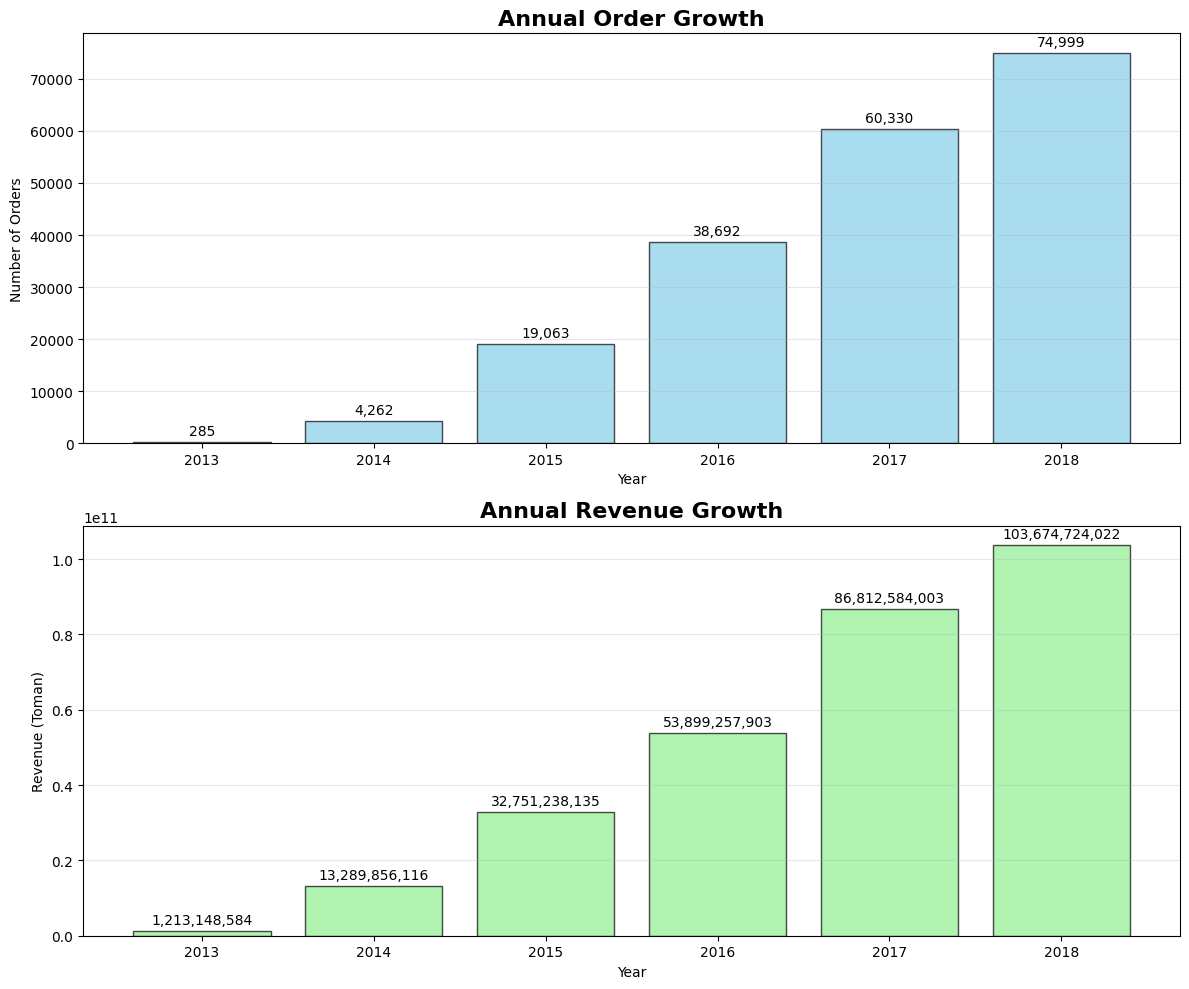

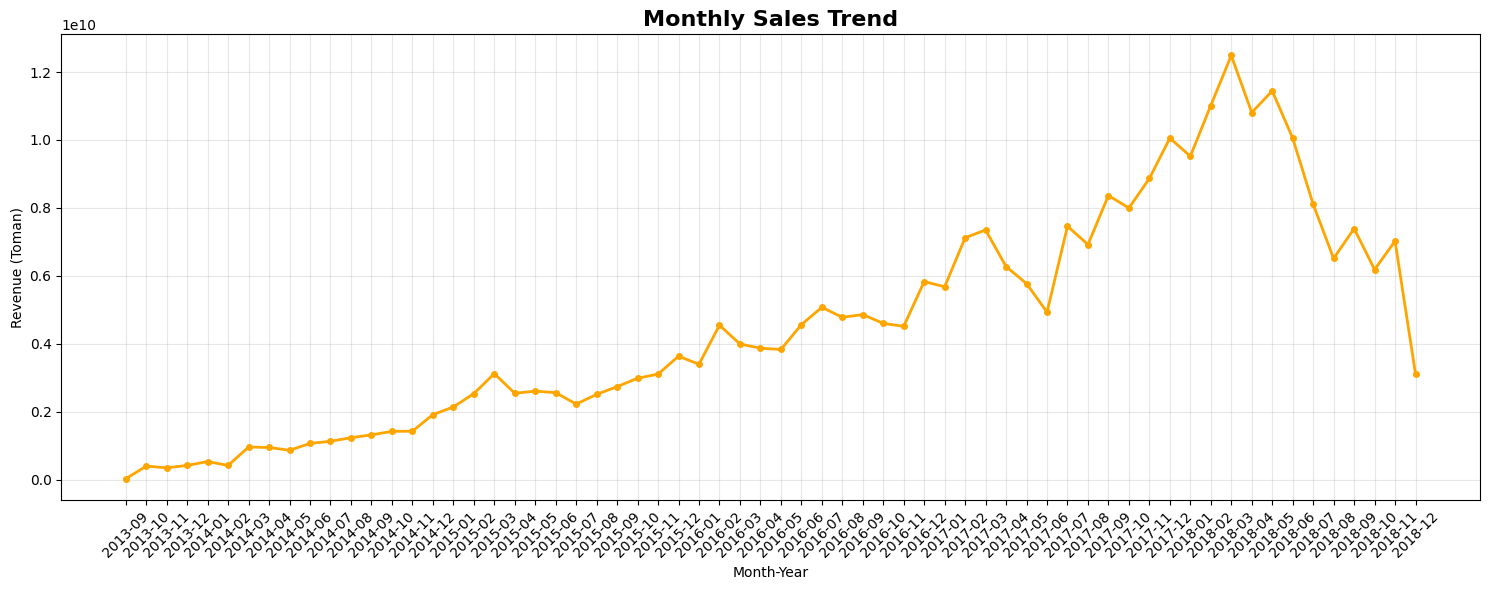

In [28]:
# Annual Sales Analysis
yearly_sales = df.groupby('year').agg(
    total_orders=('ID_Order', 'nunique'),
    total_revenue=('Amount_Gross_Order', 'sum'),
    avg_order_value=('Amount_Gross_Order', 'mean')
).reset_index()

# Monthly Sales Analysis
monthly_sales = df.groupby(['year', 'month', 'month_name']).agg(
    total_orders=('ID_Order', 'nunique'),
    total_revenue=('Amount_Gross_Order', 'sum')
).reset_index()
monthly_sales['month_year'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str).str.zfill(2)

# %%
# Annual Sales Growth Chart
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Annual Order Count Chart
ax1.bar(yearly_sales['year'].astype(str), yearly_sales['total_orders'], 
        color='skyblue', alpha=0.7, edgecolor='black')
ax1.set_title('Annual Order Growth', fontsize=16, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Orders')
ax1.grid(axis='y', alpha=0.3)

# Add values on top of bars
for i, v in enumerate(yearly_sales['total_orders']):
    ax1.text(i, v + 0.01 * max(yearly_sales['total_orders']), 
             f'{v:,}', ha='center', va='bottom')

# Annual Revenue Chart
ax2.bar(yearly_sales['year'].astype(str), yearly_sales['total_revenue'], 
        color='lightgreen', alpha=0.7, edgecolor='black')
ax2.set_title('Annual Revenue Growth', fontsize=16, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Revenue (Toman)')
ax2.grid(axis='y', alpha=0.3)

# Add values on top of bars
for i, v in enumerate(yearly_sales['total_revenue']):
    ax2.text(i, v + 0.01 * max(yearly_sales['total_revenue']), 
             f'{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Monthly Sales Trend (Line Chart)
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales['month_year'], monthly_sales['total_revenue'], 
         marker='o', linewidth=2, markersize=4, color='orange')
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month-Year')
plt.ylabel('Revenue (Toman)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


<div class="note" style="
background-color: #FFF2CC;  /* پس‌زمینه زرد ملایم */
border-left: 4px solid #E69F00;  /* حاشیه نارنجی */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>8) تحلیل الگوهای ساعتی فروش و درآمد</h1>

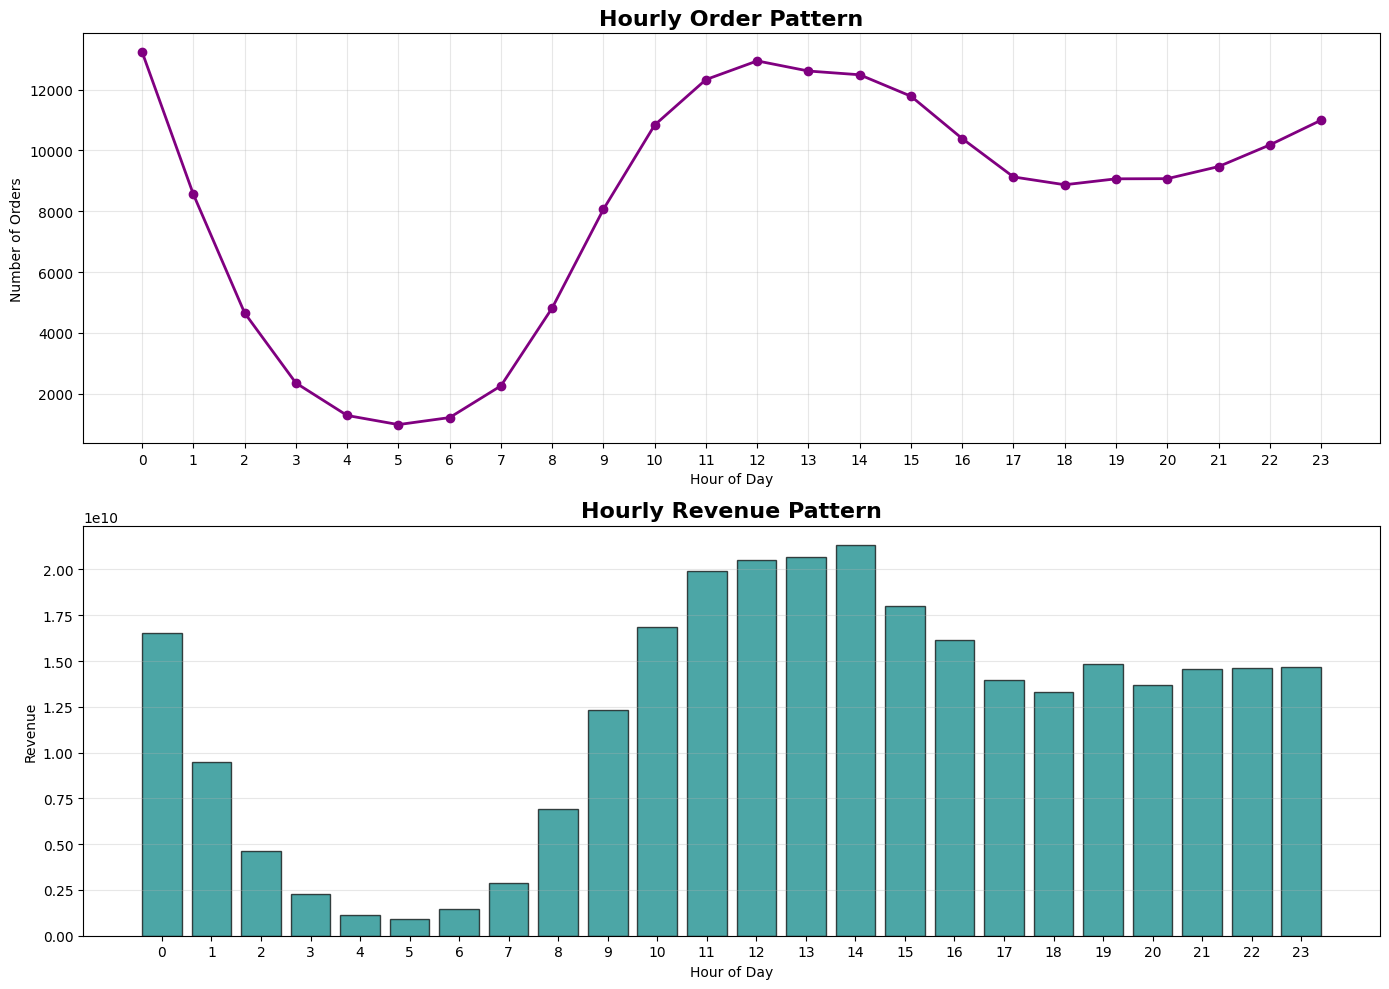

In [29]:
# Hourly Patterns Analysis
hourly_pattern = df.groupby('hour').agg(
    order_count=('ID_Order', 'nunique'),
    total_revenue=('Amount_Gross_Order', 'sum'),
    avg_order_value=('Amount_Gross_Order', 'mean')
).reset_index()

# Daily Patterns Analysis
daily_pattern = df.groupby('day_name').agg(
    order_count=('ID_Order', 'nunique'),
    total_revenue=('Amount_Gross_Order', 'sum'),
    avg_order_value=('Amount_Gross_Order', 'mean')
).reset_index()

# Order of Days in a Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pattern['day_name'] = pd.Categorical(daily_pattern['day_name'], categories=day_order, ordered=True)
daily_pattern = daily_pattern.sort_values('day_name')

# %%
# Hourly Pattern Charts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Hourly Order Count
ax1.plot(hourly_pattern['hour'], hourly_pattern['order_count'], 
         marker='o', linewidth=2, markersize=6, color='purple')
ax1.set_title('Hourly Order Pattern', fontsize=16, fontweight='bold')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of Orders')
ax1.set_xticks(range(0, 24))
ax1.grid(True, alpha=0.3)

# Hourly Revenue
ax2.bar(hourly_pattern['hour'], hourly_pattern['total_revenue'], 
        color='teal', alpha=0.7, edgecolor='black')
ax2.set_title('Hourly Revenue Pattern', fontsize=16, fontweight='bold')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Revenue')
ax2.set_xticks(range(0, 24))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

<div class="note" style="
background-color: #FFF2CC;  /* پس‌زمینه زرد ملایم */
border-left: 4px solid #E69F00;  /* حاشیه نارنجی */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>9) تحلیل نمودارهای فرووش و درآمد روزانه</h1>

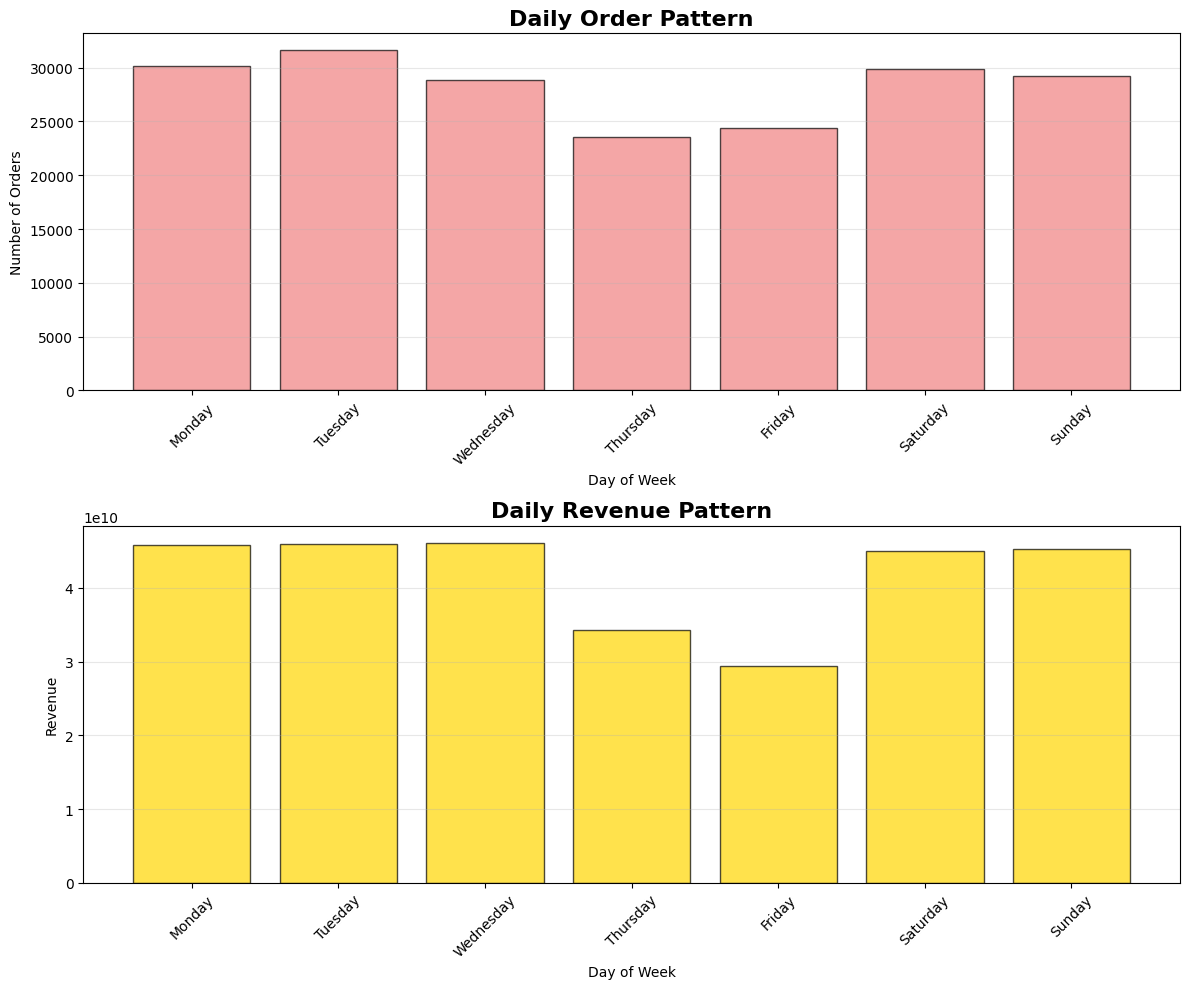

In [30]:
# Daily Pattern Charts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Daily Order Count
ax1.bar(daily_pattern['day_name'], daily_pattern['order_count'], 
        color='lightcoral', alpha=0.7, edgecolor='black')
ax1.set_title('Daily Order Pattern', fontsize=16, fontweight='bold')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Number of Orders')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Daily Revenue
ax2.bar(daily_pattern['day_name'], daily_pattern['total_revenue'], 
        color='gold', alpha=0.7, edgecolor='black')
ax2.set_title('Daily Revenue Pattern', fontsize=16, fontweight='bold')
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Revenue')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


<div class="note" style="
background-color: #FFF2CC;  /* پس‌زمینه زرد ملایم */
border-left: 4px solid #E69F00;  /* حاشیه نارنجی */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>10) تحلیل سری زمانی</h1>

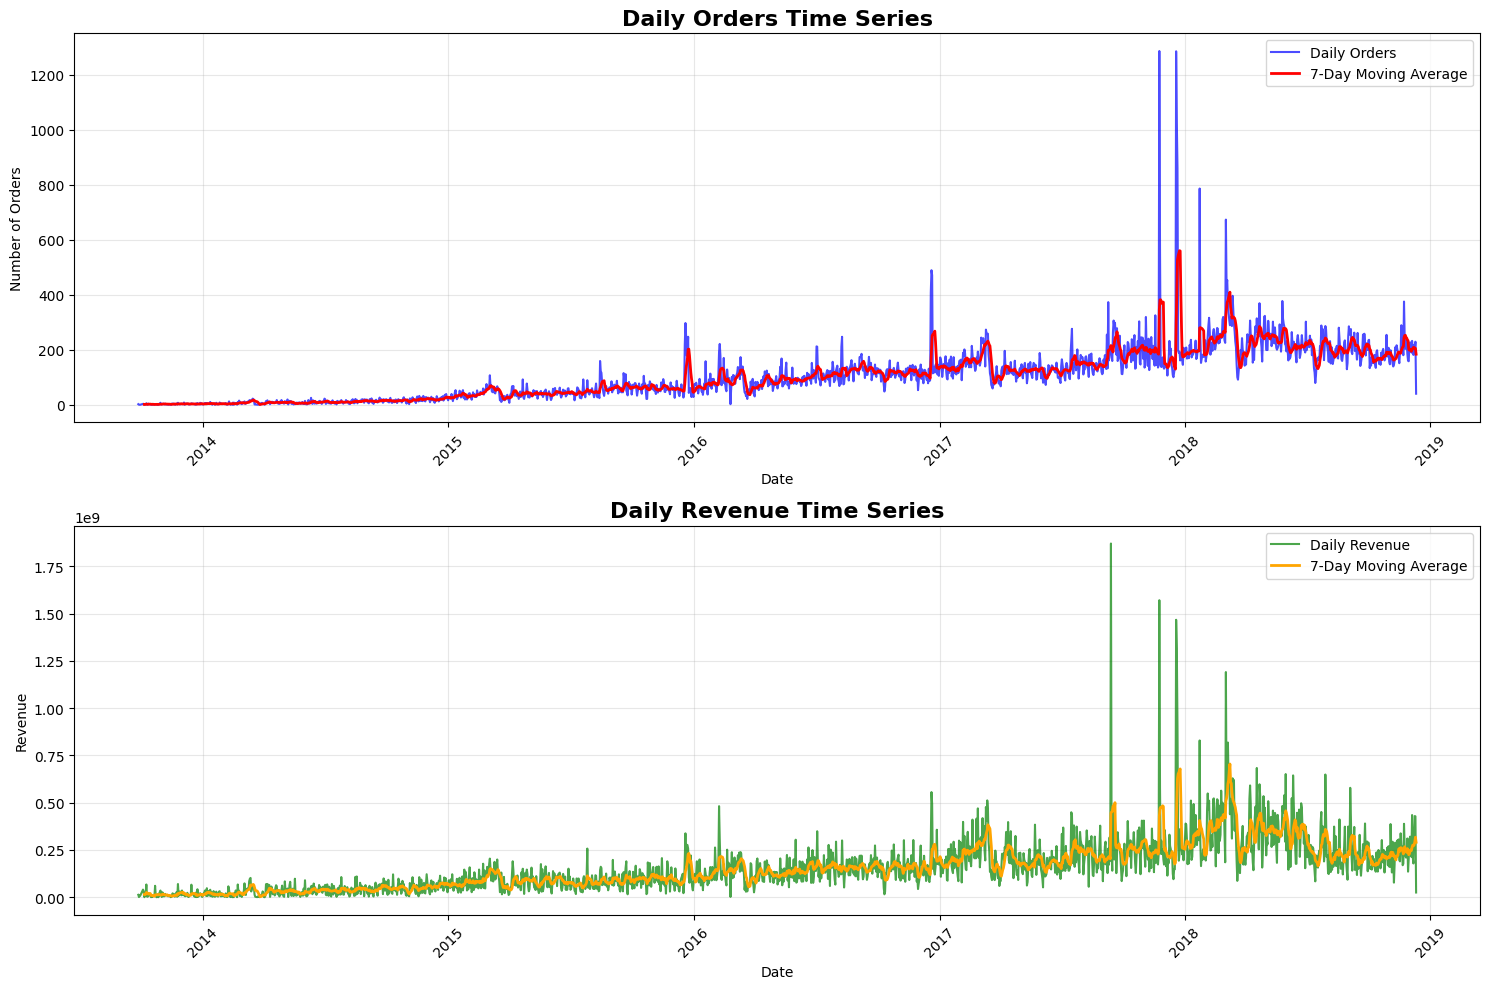

In [31]:
# Create Daily Time Series
daily_time_series = df.groupby('date').agg(
    daily_orders=('ID_Order', 'nunique'),
    daily_revenue=('Amount_Gross_Order', 'sum'),
    avg_daily_order_value=('Amount_Gross_Order', 'mean')
).reset_index()

# Calculate 7-Day Moving Average
daily_time_series['7d_ma_orders'] = daily_time_series['daily_orders'].rolling(window=7).mean()
daily_time_series['7d_ma_revenue'] = daily_time_series['daily_revenue'].rolling(window=7).mean()

# %%
# Time Series Plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Orders Time Series
ax1.plot(daily_time_series['date'], daily_time_series['daily_orders'], 
         label='Daily Orders', alpha=0.7, color='blue')
ax1.plot(daily_time_series['date'], daily_time_series['7d_ma_orders'], 
         label='7-Day Moving Average', linewidth=2, color='red')
ax1.set_title('Daily Orders Time Series', fontsize=16, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Orders')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Revenue Time Series
ax2.plot(daily_time_series['date'], daily_time_series['daily_revenue'], 
         label='Daily Revenue', alpha=0.7, color='green')
ax2.plot(daily_time_series['date'], daily_time_series['7d_ma_revenue'], 
         label='7-Day Moving Average', linewidth=2, color='orange')
ax2.set_title('Daily Revenue Time Series', fontsize=16, fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Revenue')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<div class="note" style="
background-color: #FFF2CC;  /* پس‌زمینه زرد ملایم */
border-left: 4px solid #E69F00;  /* حاشیه نارنجی */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>11) تحلیل جغرافیایی</h1>

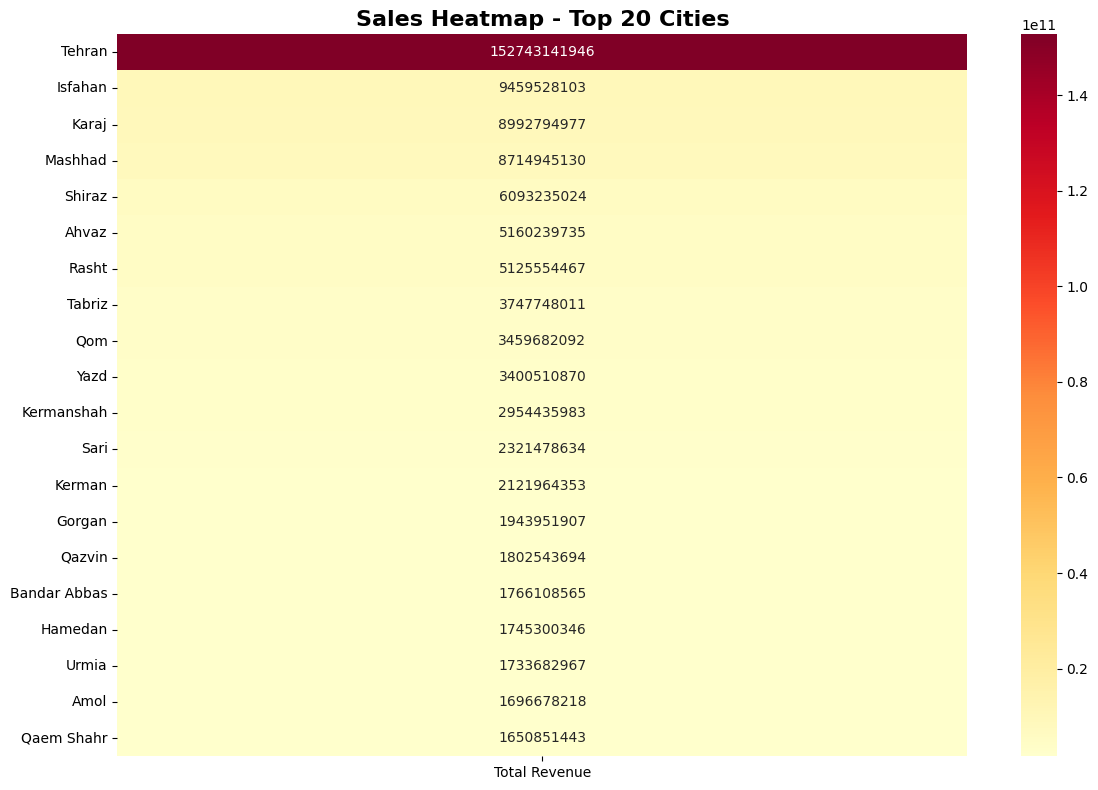

In [ ]:
# دیکشنری تبدیل شهرها از فارسی به انگلیسی
fa_to_en = {
    'محمود آباد': 'Mahmoudabad',
    'خرمدره': 'Khorramdarreh',
    'قرچک': 'Qarchak',
    'قم': 'Qom',
    'تهران': 'Tehran',
    'مشهد': 'Mashhad',
    'اصفهان': 'Isfahan',
    'رشت': 'Rasht',
    'خرمشهر': 'Khorramshahr',
    'لالی': 'Lali',
    'تنکابن': 'Tonekabon',
    'کرج': 'Karaj',
    'اهواز': 'Ahvaz',
    'شاهین شهر': 'Shahin Shahr',
    'زنجان': 'Zanjan',
    'ساری': 'Sari',
    'کلور': 'Kelur',
    'هچیرود': 'Hachirood',
    'مبارکه': 'Mobarakeh',
    'آبادان': 'Abadan',
    'کیش': 'Kish',
    'بندر انزلی': 'Bandar Anzali',
    'بروجرد': 'Borujerd',
    'قائم شهر': 'Qaem Shahr',
    'آستانه اشرفیه': 'Astaneh Ashrafieh',
    'شیراز': 'Shiraz',
    'آمل': 'Amol',
    'کرمانشاه': 'Kermanshah',
    'بوشهر': 'Bushehr',
    'قزوین': 'Qazvin',
    'بندر عباس': 'Bandar Abbas',
    'نیشابور': 'Neyshabur',
    'تبریز': 'Tabriz',
    'اراک': 'Arak',
    'ایلام': 'Ilam',
    'لاهیجان': 'Lahijan',
    'علی آباد': 'Aliabad',
    'یزد': 'Yazd',
    'زابل': 'Zabol',
    'شهرکرد': 'Shahrekord',
    'رویدر': 'Ruydar',
    'کبودر آهنگ': 'Kabudarahang',
    'تاکستان': 'Takestan',
    'هشتگرد': 'Hashtgerd',
    'گرگان': 'Gorgan',
    'خمام': 'Khomam',
    'ورزنه': 'Varzaneh',
    'گنبدکاووس': 'Gonbad-e Kavus',
    'همدان': 'Hamedan',
    'زرند': 'Zarand',
    'نوشهر': 'Nowshahr',
    'هادیشهر': 'Hadishahr',
    'شهریار': 'Shahriar',
    'فلاورجان': 'Falavarjan',
    'کازرون': 'Kazerun',
    'دیواندره': 'Divandarreh',
    'خمین': 'Khomein',
    'صغاد': 'Saghad',
    'شهر جدید صدرا': 'Shahr-e Jadid-e Sadra',
    'کرمان': 'Kerman',
    'بیرجند': 'Birjand',
    'آستارا': 'Astara',
    'اردبیل': 'Ardabil',
    'دزفول': 'Dezful',
    'نجف آباد': 'Najafabad',
    'دورود': 'Dorud',
    'سمنان': 'Semnan',
    'ساوه': 'Saveh',
    'خرم آباد': 'Khorramabad',
    'سربیشه': 'Sarbisheh',
    'سبزوار': 'Sabzevar',
    'سیاهکل': 'Siahkal',
    'فومن': 'Fuman',
    'اسلام آباد غرب': 'Eslamabad-e Gharb',
    'اسلامشهر': 'Eslamshahr',
    'سردشت': 'Sardasht',
    'جیرفت': 'Jiroft',
    'فردیس': 'Fardis',
    'شبستر': 'Shabestar',
    'لنگرود': 'Langarud',
    'گرمدره': 'Garmdareh',
    'طرقبه': 'Torghabeh',
    'شوش': 'Shush',
    'آشخانه': 'Ashkhaneh',
    'ارزوئیه': 'Orzueeyeh',
    'میاندوآب': 'Miandoab',
    'الیگودرز': 'Aligudarz',
    'تربت جام': 'Torbat-e Jam',
    'کوهدشت': 'Kuhdasht',
    'یاسوج': 'Yasuj',
    'بستک': 'Bastak',
    'درگهان': 'Dargahan',
    'تویسرکان': 'Tuyserkan',
    'زاهدان': 'Zahedan',
    'ارومیه': 'Urmia',
    'تفت': 'Taft',
    'گلپایگان': 'Golpayegan',
    'لار': 'Lar',
    'بهبهان': 'Behbahan',
    # بقیه شهرها را می‌توان اضافه کرد
}

# ایجاد ستون انگلیسی
df['city_name_en'] = df['city_name_fa_cleaned'].map(fa_to_en)

# تحلیل جغرافیایی بر اساس نام انگلیسی
city_analysis = df.groupby('city_name_en').agg(
    total_orders=('ID_Order', 'nunique'),
    total_revenue=('Amount_Gross_Order', 'sum'),
    avg_order_value=('Amount_Gross_Order', 'mean'),
    unique_customers=('ID_Customer', 'nunique')
).reset_index()

# فیلتر شهرهای با حداقل ۱۰ سفارش
city_analysis = city_analysis[city_analysis['total_orders'] >= 10].sort_values('total_revenue', ascending=False)

# %%
# نقشه حرارتی بر اساس درآمد
plt.figure(figsize=(12, 8))
heatmap_data = city_analysis.head(20).set_index('city_name_en')['total_revenue']
sns.heatmap(heatmap_data.values.reshape(-1, 1), 
            annot=True, fmt='.0f', 
            cmap='YlOrRd', 
            xticklabels=['Total Revenue'],
            yticklabels=heatmap_data.index)
plt.title('Sales Heatmap - Top 20 Cities', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# نمودار Bubble (اندازه = درآمد، رنگ = ارزش متوسط سفارش)
plt.figure(figsize=(14, 8))
scatter = plt.scatter(city_analysis.head(15)['total_orders'], 
                     city_analysis.head(15)['avg_order_value'],
                     s=city_analysis.head(15)['total_revenue']/10000,  # bubble size
                     alpha=0.6, 
                     c=city_analysis.head(15)['total_revenue'],
                     cmap='viridis')

plt.colorbar(scatter, label='Total Revenue')
plt.title('City Analysis: Number of Orders vs Average Order Value', fontsize=16, fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Average Order Value')
plt.grid(True, alpha=0.3)

# اضافه کردن نام شهرها با رنگ سفید برای تضاد بیشتر
for i, row in city_analysis.head(15).iterrows():
    plt.annotate(
        row['city_name_en'], 
        (row['total_orders'], row['avg_order_value']),
        xytext=(0, 5),  # جابجایی عمودی متن نسبت به مرکز حباب
        textcoords='offset points',
        ha='center',    # وسط چین کردن متن
        fontsize=9, 
        color='white',  # رنگ متن مخالف با اکثر رنگ‌های cmap
        weight='bold'
    )

plt.tight_layout()
plt.show()


<div class="note" style="
background-color: #FFF2CC;  /* پس‌زمینه زرد ملایم */
border-left: 4px solid #E69F00;  /* حاشیه نارنجی */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>12) شناسایی اوج خرید </h1>

In [ ]:
# Peak Purchase Analysis
peak_hours = hourly_pattern.nlargest(5, 'order_count')
peak_days = daily_pattern.nlargest(3, 'order_count')

total_orders = len(df)
peak_hours_share = peak_hours['order_count'].sum() / total_orders * 100
peak_days_share = peak_days['order_count'].sum() / total_orders * 100

# Display Peak Purchase Times
print("=" * 60)
print("📊 Peak Purchase Analysis")
print("=" * 60)

# Peak Hours
print("\nTop 5 Peak Hours (by number of orders):")
for i, row in peak_hours.iterrows():
    hour = row['hour']
    count = row['order_count']
    percent = count / total_orders * 100
    print(f"  - {hour}:00 → {count:,} orders ({percent:.1f}% of total orders)")

print(f"  → Combined share of top 5 hours: {peak_hours_share:.1f}%\n")

# Peak Days
print("Top 3 Peak Days (by number of orders):")
for i, row in peak_days.iterrows():
    day = row['day_name']
    count = row['order_count']
    percent = count / total_orders * 100
    print(f"  - {day} → {count:,} orders ({percent:.1f}% of total orders)")

print(f"  → Combined share of top 3 days: {peak_days_share:.1f}%\n")

# Peak Hour-Day Combinations
hour_day_analysis = df.groupby(['day_name', 'hour']).agg(
    order_count=('ID_Order', 'nunique')
).reset_index()

peak_hour_day = hour_day_analysis.nlargest(5, 'order_count')
print("Top 5 Peak Day-Hour Combinations:")
for i, row in peak_hour_day.iterrows():
    day = row['day_name']
    hour = row['hour']
    count = row['order_count']
    print(f"  - {day} at {hour}:00 → {count:,} orders")


<div class="note" style="
background-color: #FFF2CC;  /* پس‌زمینه زرد ملایم */
border-left: 4px solid #E69F00;  /* حاشیه نارنجی */
border-radius: 8px; 
padding: 15px; 
margin: 10px 0; 
font-family: 'B Nazanin'; 
direction: rtl; 
text-align: right;
">
<h1>13) تحلیل علّی عوامل موثر بر فروش</h1>

In [ ]:
# Correlation Analysis
correlation_analysis = df[['Amount_Gross_Order', 'Quantity_item', 'hour', 'day']].corr()

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_analysis, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Sales Factors', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# %%
# Detailed Factor Analysis
print(" Causal Analysis of Factors Affecting Sales")
print("=" * 60)

# Effect of item quantity on order value
corr_quantity_amount = correlation_analysis.loc['Quantity_item', 'Amount_Gross_Order']
print(f"1.  Correlation between Quantity per Order and Order Value: {corr_quantity_amount:.3f}")

# Effect of hour on order value
corr_hour_amount = correlation_analysis.loc['hour', 'Amount_Gross_Order']
print(f"2.  Correlation between Hour of Day and Order Value: {corr_hour_amount:.3f}")

# Weekend vs Weekday orders
weekend_orders = df[df['day_name'].isin(['Friday', 'Saturday'])]
weekday_orders = df[~df['day_name'].isin(['Friday', 'Saturday'])]

weekend_avg = weekend_orders['Amount_Gross_Order'].mean()
weekday_avg = weekday_orders['Amount_Gross_Order'].mean()
weekend_diff = ((weekend_avg - weekday_avg) / weekday_avg) * 100

print(f"3.  Weekend vs Weekday Order Value Difference: {weekend_diff:+.1f}%")

# Evening vs Daytime orders
evening_orders = df[df['hour'].between(18, 23)]
daytime_orders = df[df['hour'].between(9, 17)]

evening_avg = evening_orders['Amount_Gross_Order'].mean()
daytime_avg = daytime_orders['Amount_Gross_Order'].mean()
evening_diff = ((evening_avg - daytime_avg) / daytime_avg) * 100

print(f"4.  Evening (18-23) vs Daytime (9-17) Order Value Difference: {evening_diff:+.1f}%")

print("=" * 60)

# Save analyzed data
df.to_csv('order_analyzed.csv', index=False, encoding='utf-8-sig')
print(" Analyzed data has been saved to 'order_analyzed.csv'.")

# Final Summary
print("\n Exploratory Data Analysis completed successfully!")
print(" Key insights have been extracted and data is ready for modeling.")
